We are going to work on the 'Electric Vehicle Data' dataset that was provided by Kaggle as part of the Electric Vehicle Price Prediction competition.

Dataset description: This dataset contains information on the Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) that are currently registered with the Washington State Department of Licensing (DOL). This dataset was introduced as part of an official invitation-based competition on Kaggle. Our SVM model should answer the question "This is my car's model & make, along with a few other parameters, what price can this vehicle be brought or sold?”.

1.Import you data and perform basic data exploration phase

Display general information about the dataset.

Create a pandas profiling reports to gain insights into the dataset.

Handle Missing and corrupted values.

Remove duplicates, if they exist.

Handle outliers, if they exist.

Encode categorical features.

2.Select your target variable and the features

3.Split your dataset to training and test sets

4.Build and train an SVM model on the training set

5.Assess your model performance on the test set using relevant evaluation metrics

6.Discuss with your cohort alternative ways to improve your model performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
lebel = LabelEncoder()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
electric = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Electric_cars_dataset.csv")
electric.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33.9
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41.78


In [ ]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [ ]:
# this used to handle the corrupted values in the targetting value.
electric['Expected Price ($1k)'] =  electric['Expected Price ($1k)'].str.replace('N/','0').str.strip().astype(float).astype(int)
electric.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41


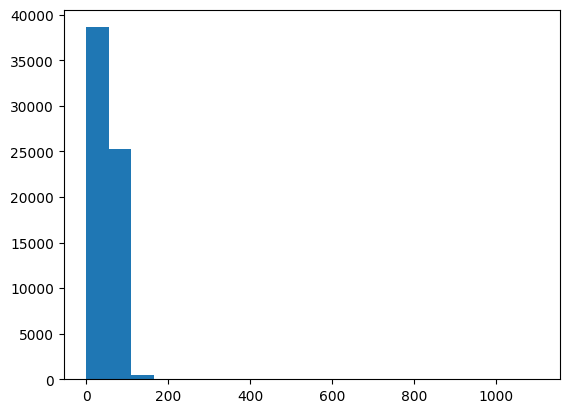

In [ ]:
plt.hist(electric['Expected Price ($1k)'], bins=20)
plt.show()

In [ ]:
electric['Expected Price ($1k)'].value_counts()

Expected Price ($1k)
69      4873
73      4795
64      3632
20      3314
18      2933
57      2791
50      2524
25      2183
21      1863
16      1862
19      1754
33      1752
72      1679
27      1631
30      1478
65      1230
40      1228
78      1206
31      1116
35      1061
22      1004
29       923
15       921
43       871
17       833
39       823
36       814
24       813
42       809
28       781
62       779
60       702
41       682
70       656
90       611
13       550
102      453
54       450
37       382
38       354
142      325
85       290
14       288
46       283
59       254
105      253
34       249
26       231
32       211
82       200
10       188
51       164
45       162
48       160
12       152
63       135
7        127
9        125
58       125
23       124
67       110
96       105
98        89
52        87
11        85
8         81
95        77
119       75
136       63
68        58
6         52
5         51
44        49
80        39
114       28
55  

In [ ]:
electric.shape

(64353, 18)

In [ ]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [ ]:
electric.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Expected Price ($1k)
count,64347.000000,64346.000000,64353.000000,64353.000000,64184.000000,6.435300e+04,64353.000000
mean,98143.452888,2018.186212,106.948985,2524.990754,29.951904,1.972905e+08,45.291253
std,2856.064329,2.726742,104.093919,12402.895104,14.661124,1.069466e+08,24.798496
min,745.000000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03,0.000000
25%,98052.000000,2017.000000,14.000000,0.000000,19.000000,1.372865e+08,22.000000
50%,98121.000000,2018.000000,73.000000,0.000000,34.000000,1.753776e+08,40.000000
75%,98370.000000,2021.000000,215.000000,0.000000,43.000000,2.299039e+08,65.000000
max,99701.000000,2022.000000,337.000000,845000.000000,49.000000,4.789346e+08,1100.000000


In [ ]:
electric.duplicated().sum()

0

In [ ]:
electric.columns

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', 'Expected Price ($1k)'],
      dtype='object')

In [ ]:
electric.isna().sum()

ID                                                     0
VIN (1-10)                                             0
County                                                 4
City                                                   9
State                                                 11
ZIP Code                                               6
Model Year                                             7
Make                                                   4
Model                                                 13
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 169
DOL Vehicle ID                                         0
Vehicle Location                                     510
Electric Utility                                     722
Expected Price ($1k)           

In [ ]:
# Check if the column is numeric
# Handle non-numeric columns, e.g., fill with the most frequent value
for column in electric.columns:
  if electric[column].isna().sum() > 0:
    if electric[column].dtype in ['int64', 'float64']:
        electric[column].fillna(electric[column].mean(), inplace=True)
    else:
        electric[column].fillna(electric[column].mode()[0], inplace=True)


In [ ]:
electric.isnull().sum()

ID                                                   0
VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
ZIP Code                                             0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
Expected Price ($1k)                                 0
dtype: int

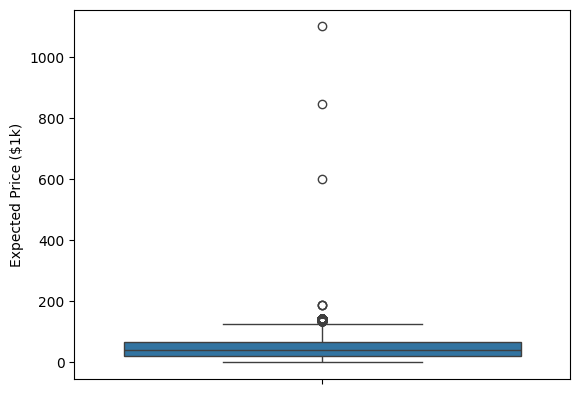

In [ ]:
sns.boxplot(electric['Expected Price ($1k)'])
plt.show()



In [ ]:
#Handle outliers, if they exist
# Remove outliers using Interquatile range
Q1 = electric['Expected Price ($1k)'].quantile(0.25)
Q3 = electric['Expected Price ($1k)'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
outliers = electric[((electric['Expected Price ($1k)']) < lower) | (electric['Expected Price ($1k)'] > upper)]
outliers.shape

(394, 18)

In [ ]:
# to drop the out liers
electric = electric.drop(outliers.index)
electric.head()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
0,EV33174,5YJ3E1EC6L,Snohomish,LYNNWOOD,WA,98037.0,2020.0,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,32.0,109821694,POINT (-122.287614 47.83874),PUGET SOUND ENERGY INC,50
1,EV40247,JN1AZ0CP8B,Skagit,BELLINGHAM,WA,98229.0,2011.0,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,40.0,137375528,POINT (-122.414936 48.709388),PUGET SOUND ENERGY INC,15
2,EV12248,WBY1Z2C56F,Pierce,TACOMA,WA,98422.0,2015.0,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,81,0,27.0,150627382,POINT (-122.396286 47.293138),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,18
3,EV55713,1G1RD6E44D,King,REDMOND,WA,98053.0,2013.0,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,45.0,258766301,POINT (-122.024951 47.670286),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),33
4,EV28799,1G1FY6S05K,Pierce,PUYALLUP,WA,98375.0,2019.0,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,25.0,296998138,POINT (-122.321062 47.103797),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,41


In [ ]:
# to confirm the outlies shape
electric. shape

(63959, 18)

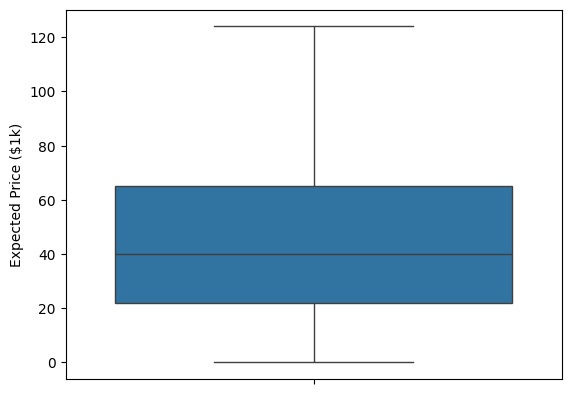

In [ ]:

# Verify the changes from thr outliers plot
sns.boxplot(electric['Expected Price ($1k)'])
plt.show()

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=ad721fab617ae50e9d0c9760f959c0c588a83c2198a1bb896b7d56f839f8e301
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(electric, title="Electric_Car")
profile.to_file('/content/Electric_cars_datat.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# Encode categorical features
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()


In [ ]:
# Encode categorical features
# Turn categorical values to numerical using label encoding
electric_col = electric.select_dtypes(include=['object']).columns
electric_col

Index(['ID', 'VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [ ]:
for column in electric_col: # Convert Categorical Data to Numerical
    electric[column] = label.fit_transform(electric[column])
electric.tail()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
64348,41437,3810,60,433,35,98144.0,2020.0,14,59,0,0,239,0,37.0,156575107,324,52,33
64349,24972,3109,95,473,35,98402.0,2013.0,29,67,1,2,6,0,27.0,211048701,385,20,13
64350,13824,276,60,433,35,98119.0,2018.0,5,14,0,0,238,0,36.0,135543411,361,52,22
64351,56405,5187,60,433,35,98115.0,2017.0,23,18,1,2,14,0,46.0,192459907,322,52,45
64352,881,1041,69,481,35,98591.0,2019.0,21,51,0,0,150,0,20.0,477551595,483,21,35


In [ ]:
electric.corr()

,ID,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Expected Price ($1k)
ID,1.000000,0.014134,0.000358,0.000751,-0.001651,0.001059,-0.001310,0.011497,0.006383,-0.009047,-0.015756,0.003251,0.008121,0.001928,0.001208,-0.004677,0.000774,0.006381
VIN (1-10),0.014134,1.000000,-0.029834,-0.000366,0.007979,0.001542,0.160679,0.225780,0.058039,0.048046,0.238502,-0.124368,0.147608,0.042607,-0.028297,-0.006394,0.015573,0.166914
County,0.000358,-0.029834,1.000000,-0.178999,-0.001508,0.022098,-0.038792,-0.035255,0.004897,0.022474,0.009497,-0.024363,0.001777,-0.129813,0.000930,-0.016382,0.144014,-0.060509
City,0.000751,-0.000366,-0.178999,1.000000,0.009897,0.034983,0.004277,-0.021950,-0.004614,0.014545,0.005239,-0.009231,-0.005176,0.048466,0.000676,0.003724,-0.254931,-0.023683
State,-0.001651,0.007979,-0.001508,0.009897,1.000000,0.538255,0.010021,0.010824,-0.006413,-0.016714,-0.000517,-0.006537,-0.004948,0.001739,0.002289,-0.017840,-0.028698,0.006476
ZIP Code,0.001059,0.001542,0.022098,0.034983,0.538255,1.000000,-0.003979,-0.003733,0.002734,0.000100,0.005262,-0.010048,-0.000043,-0.045896,-0.000786,-0.116807,-0.090567,-0.007773
Model Year,-0.001310,0.160679,-0.038792,0.004277,0.010021,-0.003979,1.000000,0.203683,0.014425,-0.200533,0.198897,-0.074474,-0.225008,0.020668,-0.115548,-0.051421,0.040957,0.564169
Make,0.011497,0.225780,-0.035255,-0.021950,0.010824,-0.003733,0.203683,1.000000,0.157888,-0.501946,-0.069009,0.223141,0.023099,0.059326,0.014260,-0.060841,0.077615,0.565626
Model,0.006383,0.058039,0.004897,-0.004614,-0.006413,0.002734,0.014425,0.157888,1.000000,0.262472,0.004742,-0.152882,0.046219,-0.017352,-0.012367,-0.031847,0.000330,0.133900
Electric Vehicle Type,-0.009047,0.048046,0.022474,0.014545,-0.016714,0.000100,-0.200533,-0.501946,0.262472,1.000000,0.498345,-0.431934,0.045921,-0.061618,0.030523,0.044653,-0.078400,-0.418991


In [ ]:
# Select the target variable
y = electric['Expected Price ($1k)'].values
# Select the features
X = electric[['Make', 'Model', 'Electric Range', 'Electric Vehicle Type','Clean Alternative Fuel Vehicle (CAFV) Eligibility','Base MSRP']].values


In [ ]:
#Split Dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [ ]:
# Build and Train an SVM Model
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train an SVM model
svm = SVR()
svm.fit(X_train_scaled, y_train)


SVR()

In [ ]:
# Assess Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
y_pred = svm.predict(X_test_scaled)

# Evaluate the performance of the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

MAE: 5.1286867524868125
MSE: 90.50774034195065
R2: 0.8294468557498085


REPORT

Introduction

The ML model objective is to predict the likelihood of the price a vehicle be brought or sold?(Expected Price ($1k)) given a set of indicators with columns name 'Make', 'Model','Base MSRP','Electric Vehicle Type','Electric Range','Clean Alternative Fuel Vehicle (CAFV) Eligibility'.

The dataset ("Electric_cars_dataset.csv") has a size of 5.9mb, with 18 columns and 43199 rows entries.

Methodology

There were 1455 missing values, and there was presence of outliers in 'Expected Price ($1k)', it was dealt with using interquantile range.
Labelencoder was used to deal with the categorical variables
X and Y was established, the dependent variable is 'Expected Price ($1k)'
the test size was set as 20%(0.2) and the train would be 80%.
Support Vector Machine (SVM) was the model used.
mean absolute error, mean squared error, rsquared score were used as the performance metrics.
Results The result on the test set are as follows: Mean Absolute Error (MAE): 5.14 Mean Squared Error (MSE): 90.68 R-squared (R²): 0.82

Discussion The results of the SVM regression model show promising performance in predicting the expected price of electric vehicles. The model achieved a mean absolute error (MAE) of $5.14,a mean squared error (MSE) of 90.68, and an R-squared (R²) score of 0.82.

The low MAE indicates that, on average, the model's predictions are within 5.14 of the true expected price. The MSE of $90.68 suggests the model is making relatively small errors on average, without being overly sensitive to outliers or large errors. The R-squared score of 0.82 implies the model is able to explain 82% of the variance in the expected price of electric vehicles. This is a strong result, indicating the input features (make, model, MSRP, electric vehicle type, electric range, and CAFV eligibility) are highly predictive of the target variable.

These performance metrics suggest the SVM regression model is well-suited for this task and could be a useful tool for stakeholders in the electric vehicle market. The model appears to be capturing the key relationships between the input features and the expected price, allowing for reasonably accurate predictions.


